# 定義 graphene 晶格模型



首先，引入所需的模組。例如numpy、scipy、等等。

In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

以及 graphene 的各項參數。

In [2]:
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.8      # [eV] nearest neighbour hopping

## 生成 graphene 晶格模型

graphene 的晶格模型示意圖如下。

In [3]:
from IPython.display import Image
Image(filename = '/home/xuangfu/Documents/graphene/graphene_defing/graphene.png', width=600, height=600)

FileNotFoundError: [Errno 2] No such file or directory: '/home/xuangfu/Documents/graphene/graphene_defing/graphene.png'

定義函式，給定 lattice 與 sublattice，以及各點之間的hopping element。<br>
在此我們假定只有相鄰兩原子之間具有 hopping。<br>
若想以更高階（二次相鄰、三次相鄰），可參考 [Tight-binding description of graphene](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.66.035412) 所描述的方法。
<br>

In [4]:
def monolayer_graphene(a, t):

    lat = pb.Lattice(a1 = [3*a/2, sqrt(3)*a/2], a2 = [3*a/2, -sqrt(3)*a/2])
    lat.add_sublattices(('a', [0, 0]), ('b', [a/2, sqrt(3)*a/2]))

    lat.add_hoppings(([0,  0], 'a', 'b', t),
                     ([-1, 1], 'a', 'b', t),
                     ([-1, 0], 'a', 'b', t))                   

    return lat

<br>
畫出 lat 所產生的晶格結構。

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


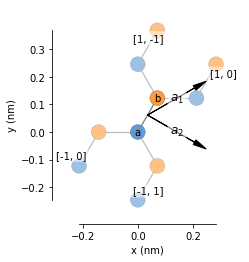

In [5]:
lat = monolayer_graphene(a_cc, t)
lat.plot()


<br>
以及所對應的 brillouin zone。 

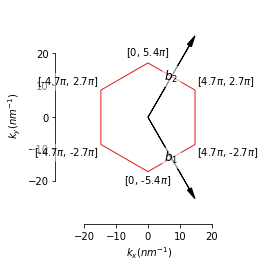

In [6]:
lat.plot_brillouin_zone()

## 建構 graphene 的 hamiltonian
我們已經成功建立 graphene 的晶格模型，<br>
接下來將以 pb.Model 列出此系統的 hamiltonian

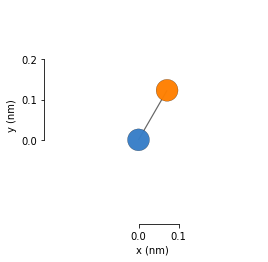

In [7]:
model = pb.Model(lat)
model.plot()


In [8]:
hamiltonian = model.hamiltonian.todense()
hamiltonian

#np.linalg.eig(model.hamiltonian.todense())

matrix([[ 0. , -2.8],
        [-2.8,  0. ]], dtype=float32)


<br>
引進 Translational symmertry

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


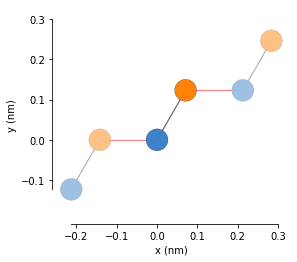

In [9]:
model = pb.Model(lat,
                 pb.translational_symmetry(a1 = True, a2 = False))
model.plot()

In [10]:
hamiltonian = model.hamiltonian.todense()
hamiltonian

matrix([[ 0. +0.j, -5.6+0.j],
        [-5.6+0.j,  0. +0.j]], dtype=complex64)

In [11]:
np.linalg.eig(hamiltonian)

(array([ 5.6+0.j, -5.6+0.j], dtype=complex64),
 matrix([[ 0.70710677+0.j,  0.70710677+0.j],
         [-0.70710677-0.j,  0.70710677+0.j]], dtype=complex64))

In [12]:
solver = pb.solver.lapack(model)
solver.eigenvalues

array([-5.6,  5.6], dtype=float32)

In [13]:
solver.eigenvectors

array([[-0.70710677+0.j, -0.70710677+0.j],
       [-0.70710677+0.j,  0.70710677+0.j]], dtype=complex64)

## 畫出對應的能帶結構
以上是簡單構建單層 graphene 系統的方式，接著將利用 pb.calc_bands() <br>解出對應的能帶結構。

首先，先定義 brillouin zone 中的高對稱點。

In [14]:
Gamma = [0, 0]
K1 = [2*pi/(3*a_cc), 2*pi/(3*sqrt(3)*a_cc)]
M = [2*pi/(3*a_cc), 0]
K2 = [2*pi/(3*a_cc), -2*pi/(3*sqrt(3)*a_cc)]

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


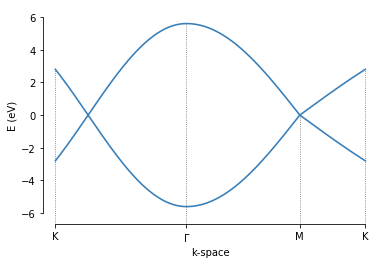

In [15]:
bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


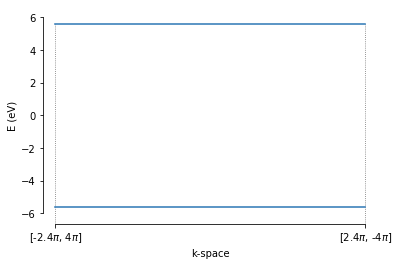

In [16]:
bands = solver.calc_bands([-4.7*pi/2, 8.1*pi/2], [4.7*pi/2, -8.1*pi/2])
bands.plot()


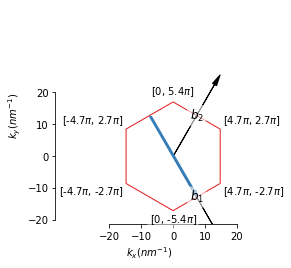

In [17]:
bands.plot_kpath()
lat.plot_brillouin_zone()